In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import colors
from skimage import exposure

In [10]:
def shadow_remove(img):
    scale_percent = 30
    # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized_image = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    rgb_planes = cv2.split(resized_image)
    result_norm_planes = []
    for plane in rgb_planes:
        dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
        bg_img = cv2.medianBlur(dilated_img, 21)
        diff_img = 255 - cv2.absdiff(plane, bg_img)
        norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
        result_norm_planes.append(norm_img)
    shadowremov = cv2.merge(result_norm_planes)
    return shadowremov

In [11]:
# def hog_preproessing_try(image):
#     # image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     # filtered_image  = cv2.GaussianBlur(image, (3, 3), 1.0)
#     # plt.imshow(filtered_image)
#     # plt.show()
#     # resized_image = cv2.resize(filtered_image,(500,500))
#     # hsv_nemo = cv2.cvtColor(resized_image, cv2.COLOR_RGB2HSV)
#     # #===================================first Mask======================================================//
#     # # Z = np.float32(hsv_nemo.reshape((-1,3)))
#     # # criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
#     # # K = 2
#     # # _,labels,centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
#     # # labels = labels.reshape((hsv_nemo.shape[:-1]))
#     # #=====================================Second Mask======================================================//
#     # #=======================plotting
#     # pixel_colors = resized_image.reshape((np.shape(resized_image)[0]*np.shape(resized_image)[1], 3))
#     # norm = colors.Normalize(vmin=-1.,vmax=1.)
#     # norm.autoscale(pixel_colors)
#     # pixel_colors = norm(pixel_colors).tolist()
#     # h, s, v = cv2.split(hsv_nemo)
#     # fig = plt.figure()
#     # axis = fig.add_subplot(1, 1, 1, projection="3d")
#     # axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
#     # axis.set_xlabel("Hue")
#     # axis.set_ylabel("Saturation")
#     # axis.set_zlabel("Value")
#     # plt.show()
#     # #==========================range
#     # # result=resized_image
#     # light_orange = (0, 50, 50 )
#     # dark_orange = (25, 200, 255)
#     # # for i, c in enumerate(centers):
#     # #     print(c)
#     # #     print(all(int(c[j]) in range(light_orange[j],dark_orange[j]) for j in range(3)))
#     # #     if all(int(c[j]) in range(light_orange[j],dark_orange[j]) for j in range(3)):
#     # #             print("in check")
#     # #             mask = cv2.inRange(labels, i, i)
#     # #             mask = np.dstack([mask]*3) # Make it 3 channel
#     # #             result = cv2.bitwise_and(resized_image, mask)
#     # mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)
#     # plt.imshow(mask)
#     # plt.show()
#     # kernel = np.ones((11,11),np.uint8)
#     # # Perform closing on the thresholded image
#     # closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel,iterations=15)
#     # plt.imshow(closing)
#     # plt.show()
#     # result = cv2.bitwise_and(resized_image, resized_image, mask=closing)
#     # resized_image = cv2.resize(result,(128,128))
#     # grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_RGB2GRAY)
#     # grayscale_image = cv2.equalizeHist(grayscale_image)
#     # return grayscale_image
#     image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     filtered_image  = cv2.GaussianBlur(image, (3, 3), 1.0)
#     resized_image = cv2.resize(filtered_image,(500,500))
#     #==========================================Ploting
#     plt.imshow(resized_image)
#     plt.show()
#     r, g, b = cv2.split(resized_image)
#     fig = plt.figure()
#     axis = fig.add_subplot(1, 1, 1, projection="3d")
#     pixel_colors = resized_image.reshape((np.shape(resized_image)[0]*np.shape(resized_image)[1], 3))
#     norm = colors.Normalize(vmin=-1.,vmax=1.)
#     norm.autoscale(pixel_colors)
#     pixel_colors = norm(pixel_colors).tolist()
#     axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
#     axis.set_xlabel("Red")
#     axis.set_ylabel("Green")
#     axis.set_zlabel("Blue")
#     plt.show()
#     #======================================Color Segmentation========================#
#     hsv_image = cv2.cvtColor(resized_image, cv2.COLOR_RGB2HSV)
#     # #==================================K-Mean=======================================#
#     # Z = np.float32(hsv_image.reshape((-1,3)))
#     # criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
#     # K = 2
#     # _,labels,centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
#     # labels = labels.reshape((hsv_image.shape[:-1]))
#     # #========================================================================#
#     light_skin1 = (0, 50, 50 )
#     dark_skin1 = (50, 200, 255)
#     light_skin2 = np.array([254,241,224])
#     dark_skin2 = np.array([93,52,35])
#     # mask1=resized_image
#     # for i, c in enumerate(centers):
#     #     print(c)
#     #     if all(int(c[j]) in range(light_skin[j],dark_skin[j]) for j in range(3)): 
#     #             print('in check')
#     #             mask = cv2.inRange(labels, i, i)
#     mask1 = cv2.inRange(hsv_image, light_skin1, dark_skin1)
#     mask2 = cv2.inRange(resized_image, dark_skin2, light_skin2)

#     #Define the kernel for closing
#     kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
#     mask1 = cv2.morphologyEx(mask1, cv2.MORPH_CLOSE, kernel,iterations=10)
#     # mask2 = cv2.morphologyEx(mask2, cv2.MORPH_CLOSE, kernel,iterations=10)
#     plt.imshow(mask1,cmap='gray')
#     plt.show()
#     plt.imshow(mask2,cmap='gray')
#     plt.show()
#     # mask = np.dstack([mask]*3) # Make it 3 channel
#     result1 = cv2.bitwise_and(resized_image, resized_image, mask=mask1)
#     result2 = cv2.bitwise_and(resized_image, resized_image, mask=mask2)
#     plt.imshow(result1,cmap='gray')
#     plt.show()
#     plt.imshow(result2,cmap='gray')
#     plt.show()
#     #=========================================================
#     r, g, b = cv2.split(result2)
#     fig = plt.figure()
#     axis = fig.add_subplot(1, 1, 1, projection="3d")
#     pixel_colors = result2.reshape((np.shape(result2)[0]*np.shape(result2)[1], 3))
#     norm = colors.Normalize(vmin=-1.,vmax=1.)
#     norm.autoscale(pixel_colors)
#     pixel_colors = norm(pixel_colors).tolist()
#     axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
#     axis.set_xlabel("Red")
#     axis.set_ylabel("Green")
#     axis.set_zlabel("Blue")
#     plt.show()
# #===========================================================
#     # resized_image = cv2.resize(result,(128,128))
#     # grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_RGB2GRAY)
#     # #=====================================Contrast enhansment========================#
#     # # Apply histogram equalization to enhance contrast
#     # clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(10,10))
#     # normalized_image = clahe.apply(grayscale_image)
#     # gamma_corrected = exposure.adjust_gamma(normalized_image, gamma=2.5)
#     return result1
def hog_preprocessing(image):
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    filtered_image  = cv2.GaussianBlur(image, (3, 3), 1.0)
    # resized_image = cv2.resize(filtered_image,(500,500))
    # scale_percent = 10
    # # percent of original size
    # width = int(image.shape[1] * scale_percent / 100)
    # height = int(image.shape[0] * scale_percent / 100)
    dim = (500, 500)
    resized_image = cv2.resize(filtered_image,dim)
    #======================================Color Segmentation========================#
    hsv_image = cv2.cvtColor(resized_image, cv2.COLOR_RGB2HSV)
    light_skin = (0, 50, 50 )
    dark_skin = (50, 250, 255)
    mask = cv2.inRange(hsv_image, light_skin, dark_skin)
    #Define the kernel for closing
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    # Perform closing on the thresholded image)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel,iterations=10)
    result = cv2.bitwise_and(resized_image, resized_image, mask=mask)
    # resized_image = cv2.resize(result,(128,128))
    # scale_percent = 30
    # # percent of original size
    # width = int(image.shape[1] * scale_percent / 100)
    # height = int(image.shape[0] * scale_percent / 100)
    dim = (128, 128)
    resized_image = cv2.resize(result,dim)
    grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_RGB2GRAY)
    #=====================================Contrast enhancement========================#
    # Apply histogram equalization to enhance contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(10,10))
    normalized_image = clahe.apply(grayscale_image)
    gamma_corrected = exposure.adjust_gamma(normalized_image, gamma=2.5)
    return gamma_corrected

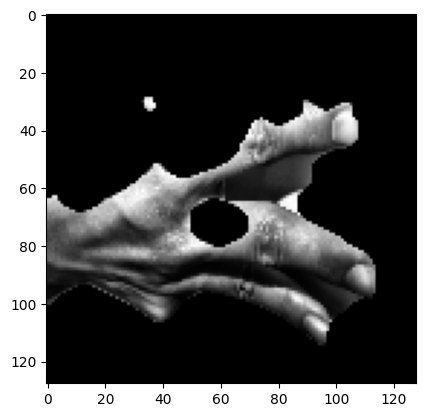

In [12]:
image = cv2.imread('E:/2nd term 3rd year/Neural Network/Project/Distrubute_dataset/validation/3_men (2).JPG', cv2.IMREAD_UNCHANGED)
img=hog_preprocessing(image)
plt.imshow(img,cmap='gray')
plt.show()

# image = cv2.imread('E:/2nd term 3rd year/Neural Network/Project/Distrubute_dataset/men/2/2_men (120).JPG', cv2.IMREAD_UNCHANGED)
# img=hog_preproessing_try(image)
# plt.imshow(img, cmap='gray')
# plt.show()